In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv("../data/complaints.csv")
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11424\1937940366.py:8: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [2]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['date_received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [9]:
df = df[['consumer_complaint_narrative', 'product']]
df.head()


,consumer_complaint_narrative,product
514012,A charge was made by a company making false cl...,Debt collection
514353,This debt is beyond the Maryland Statute of Li...,Debt collection
515232,My personal belongings and vehicle were stolen...,Debt collection
515509,I have never received medical care at this fac...,Debt collection
515702,I was taken to the hospital while XXXX XXX...,Debt collection


In [3]:
df.isnull().sum()


date_received                         0
product                               0
sub-product                      235166
issue                                 0
sub-issue                        531186
consumer_complaint_narrative     898791
company_public_response          833273
company                               0
state                             19400
zip_code                         115298
tags                            1106712
consumer_consent_provided?       591701
submitted_via                         0
date_sent_to_company                  0
company_response_to_consumer          7
timely_response?                      0
consumer_disputed?               513854
complaint_id                          0
dtype: int64

In [4]:
df = df.dropna()
df.shape


(2301, 18)

In [33]:
df['product'].value_counts().head(10)


product
Debt collection    2205
Student loan         96
Name: count, dtype: int64

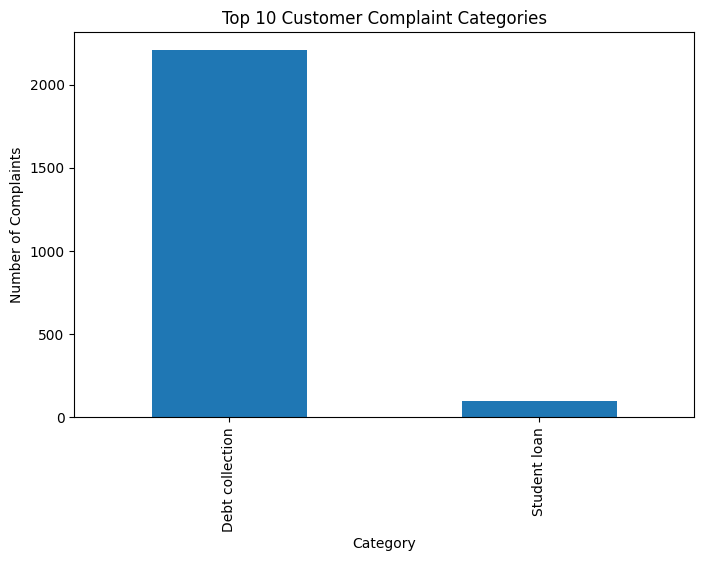

In [34]:
plt.figure(figsize=(8,5))
df['product'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Customer Complaint Categories")
plt.xlabel("Category")
plt.ylabel("Number of Complaints")
plt.show()

In [16]:
import os
os.makedirs("visuals", exist_ok=True)


In [17]:
X = df['consumer_complaint_narrative']
y = df['product']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
X_train = X_train.fillna("")
X_test = X_test.fillna("")


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)


In [21]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [25]:
y_pred = model.predict(X_test_vec)


In [26]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()



In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9609544468546638

In [28]:
feature_names = vectorizer.get_feature_names_out()


In [29]:
import numpy as np

top_words = {}

for i, category in enumerate(model.classes_):
    top_indices = np.argsort(model.feature_log_prob_[i])[-10:]
    top_words[category] = [feature_names[j] for j in top_indices]


In [30]:
for product, words in top_words.items():
    print(product)
    print(words)
    print("-" * 50)


Debt collection
['phone', 'report', '00', 'company', 'collection', 'account', 'xx', 'credit', 'debt', 'xxxx']
--------------------------------------------------
Student loan
['forbearance', 'mae', 'payment', '00', 'payments', 'xx', 'student', 'loans', 'loan', 'xxxx']
--------------------------------------------------
